In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from agents import MiniMaxQAgent
from enviroment import P2PEnergyMarketEnv
from trainer import MinimaxTrainer
from tqdm import tqdm

In [2]:
def plot_rewards(rewards, title, window_size=10):
    """
    Grafica la recompensa por episodio y su media móvil.
    
    :param rewards: Lista de recompensas obtenidas en cada episodio.
    :param window_size: Tamaño de la ventana para el promedio móvil.
    """
    episodes = np.arange(len(rewards))
    
    # Cálculo del promedio móvil
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    
    plt.figure(figsize=(10, 5))
    plt.plot(episodes, rewards, label='Recompensa por episodio', alpha=0.5)
    plt.plot(episodes[:len(smoothed_rewards)], smoothed_rewards, label=f'Promedio móvil (window={window_size})', color='red', linewidth=2)
    
    plt.xlabel('Episodios')
    plt.ylabel('Recompensa')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
agent1_actions = np.array([-0.2, 0, 0.2])
agent2_actions =  np.array([-2, 0, 2])

agent1_states = np.round(np.linspace(0, 10, 51),2) # espacio de potencias discreto de 0-10
agent2_states = np.round(np.linspace(0, 100, 51),2)# espacio de precios discretos de 0 - 100

steps = 20000
decay = 10**(np.log10(0.01)/steps)
gamma=0.9
epsilon=0.1 
alpha=1

agent1_parameters = {
    'name': 'A',
    'actions': agent1_actions,
    'opponent_actions': agent2_actions,
    'states': agent1_states,
    'opponent_states': agent2_states,
    'epsilon': epsilon,
    'gamma': gamma,
    'epsilon': epsilon,
    'alpha': alpha,
    'decay': decay,
    'rol': 'generator'
}

agent2_parameters = {
    'name': 'B',
    'actions': agent2_actions,
    'opponent_actions': agent1_actions,
    'states': agent2_states,
    'opponent_states': agent1_states,
    'epsilon': epsilon,
    'gamma': gamma,
    'epsilon': epsilon,
    'alpha': alpha,
    'decay': decay,
    'rol': 'consumer'
}

agent1 = MiniMaxQAgent(agent_parameters=agent1_parameters)
agent2 = MiniMaxQAgent(agent_parameters=agent2_parameters)
agents = [agent1, agent2]
market_env = P2PEnergyMarketEnv(a = 0.089, b = 52, c = 0)

init_generator_state = 9.8
init_consumer_state = 2

trainer = MinimaxTrainer(agent1, agent2, market_env, )



In [4]:
hist_reward_MR, MR_policy = trainer.trainMR(init_generator_state, init_consumer_state, steps)

Progreso: 100%|██████████| 20000/20000 [00:15<00:00, 1255.60step/s]


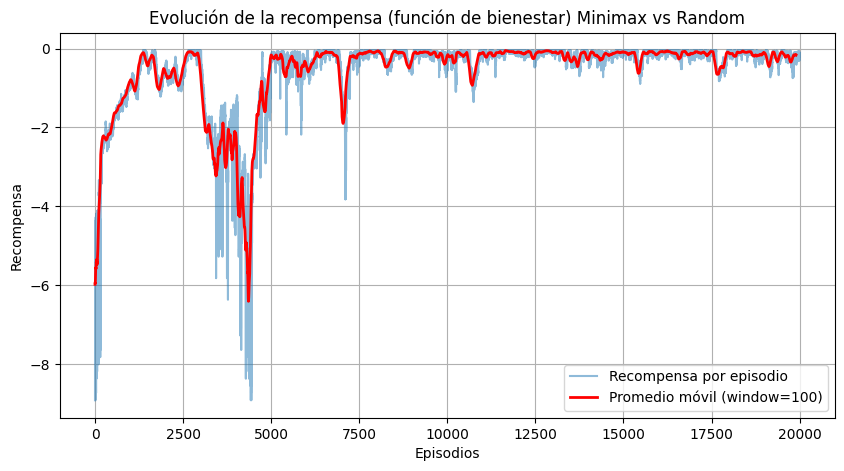

In [5]:
title = 'Evolución de la recompensa (función de bienestar) Minimax vs Random'
plot_rewards(hist_reward_MR,title, window_size=100)

In [ ]:
hist_reward_MM1, hist_reward_MM2, MM_policy1, MM_policy2 = trainer.trainMM(init_generator_state, init_consumer_state, steps)


Progreso: 100%|██████████| 20000/20000 [00:30<00:00, 658.74step/s]


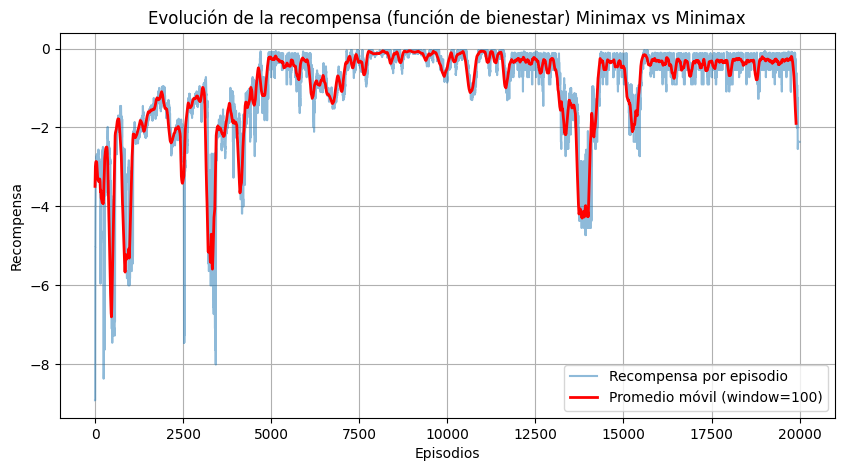

In [ ]:
title = 'Evolución de la recompensa (función de bienestar) Minimax vs Minimax'
plot_rewards(hist_reward_MM1,title, window_size=100)

Progreso: 100%|██████████| 1000/1000 [00:00<00:00, 5441.48step/s]


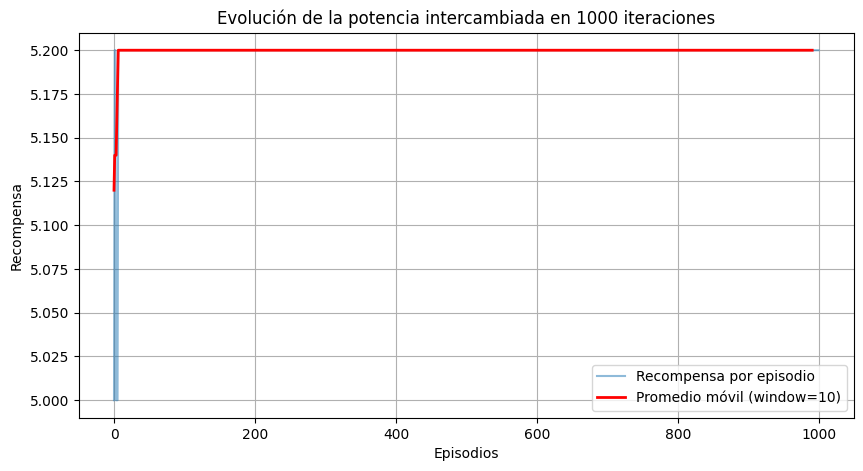

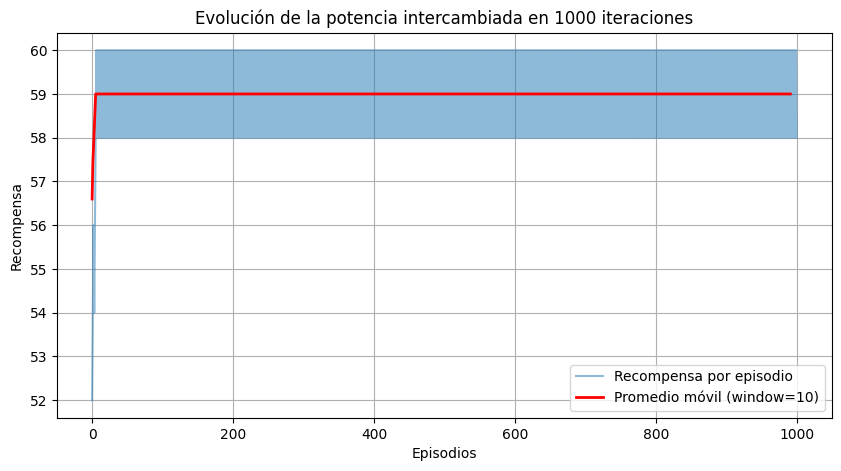

In [19]:
power, cost = trainer.evaluate(5, 50, MM_policy1, MM_policy2, 1000)
title = 'Evolución de la potencia intercambiada en 1000 iteraciones'
plot_rewards(power,title, window_size=10)
plot_rewards(cost,title, window_size=10)

In [38]:

# agent1.resetAgent()
# agent2.resetAgent()
agent1.state = (5, 50)
agent2.state = (50, 5)

power =[]
cost =[]
with tqdm(total=3, desc="Progreso", unit="step") as pbar:
    for i in range(3):
        print('state: ', agent1.state, agent2.state)
        # Agent action and next state
        action = round(agent1.select_action(MM_policy1[agent1.state]),2)
        opponent_action = round(agent2.select_action(MM_policy2[agent2.state]),2)

        print('action: ', action, opponent_action)

        joint_action1 = (action, opponent_action)
        joint_action2 = (opponent_action, action)
        print('Joint action: ',joint_action1, joint_action2)

        next_state1, _ = market_env.step(agent1, joint_action=joint_action1)
        next_state2, _ = market_env.step(agent2, joint_action=joint_action2)
        # print('step 1: ', next_state1, reward1)
        # print('step 2: ', next_state2, reward2)

        agent1.state = next_state1
        agent2.state = next_state2

        power.append(agent1.state[0])
        cost.append(agent2.state[0])
        pbar.update(1)

Progreso: 100%|██████████| 3/3 [00:00<00:00, 1539.57step/s]

state:  (5, 50) (50, 5)
action:  0.2 -2
Joint action:  (0.2, -2) (-2, 0.2)
state:  (5.2, 48) (48, 5.2)
action:  0.2 2
Joint action:  (0.2, 2) (2, 0.2)
state:  (5.4, 50) (50, 5.4)
action:  -0.2 0
Joint action:  (-0.2, 0) (0, -0.2)


In [39]:
agent1.resetAgent()
agent2.resetAgent()
agent1.state = (5, 50)
agent2.state = (50, 5)

power =[]
cost =[]
with tqdm(total=3, desc="Progreso", unit="step") as pbar:
    for i in range(3):
        print('state: ', agent1.state, agent2.state)
        # Agent action and next state
        action = round(agent1.select_action(MM_policy1[agent1.state]),2)
        opponent_action = round(agent2.select_action(MM_policy2[agent2.state]),2)

        print('action: ', action, opponent_action)

        joint_action1 = (action, opponent_action)
        joint_action2 = (opponent_action, action)
        print('Joint action: ',joint_action1, joint_action2)

        next_state1, _ = market_env.step(agent1, joint_action=joint_action1)
        next_state2, _ = market_env.step(agent2, joint_action=joint_action2)
        # print('step 1: ', next_state1, reward1)
        # print('step 2: ', next_state2, reward2)

        agent1.state = next_state1
        agent2.state = next_state2

        power.append(agent1.state[0])
        cost.append(agent2.state[0])
        pbar.update(1)

Progreso: 100%|██████████| 3/3 [00:00<00:00, 2285.31step/s]

state:  (5, 50) (50, 5)
action:  -0.2 0
Joint action:  (-0.2, 0) (0, -0.2)
state:  (4.8, 50) (50, 4.8)
action:  0.2 2
Joint action:  (0.2, 2) (2, 0.2)
state:  (5.0, 52) (52, 5.0)
action:  0.0 2
Joint action:  (0.0, 2) (2, 0.0)


In [9]:
MM_policy1

{(0.0, 0.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 2.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 4.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 6.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 8.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 10.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 12.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 14.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 16.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 18.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 20.0): {-0.2: 0.3333333333333333,
  0.

In [10]:
agent1.pi_table = MM_policy1
agent1.pi_table 

{(0.0, 0.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 2.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 4.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 6.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 8.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 10.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 12.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 14.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 16.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 18.0): {-0.2: 0.3333333333333333,
  0.0: 0.3333333333333333,
  0.2: 0.3333333333333333},
 (0.0, 20.0): {-0.2: 0.3333333333333333,
  0.

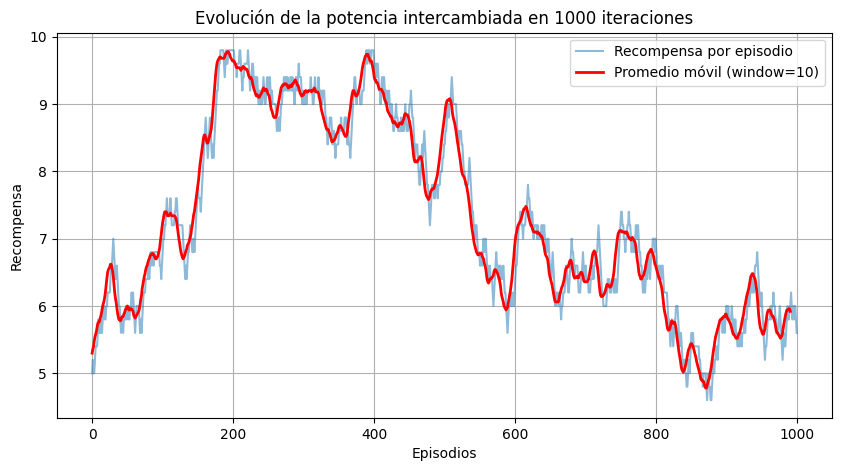

In [24]:
title = 'Evolución de la potencia intercambiada en 1000 iteraciones'
plot_rewards(power,title, window_size=10)

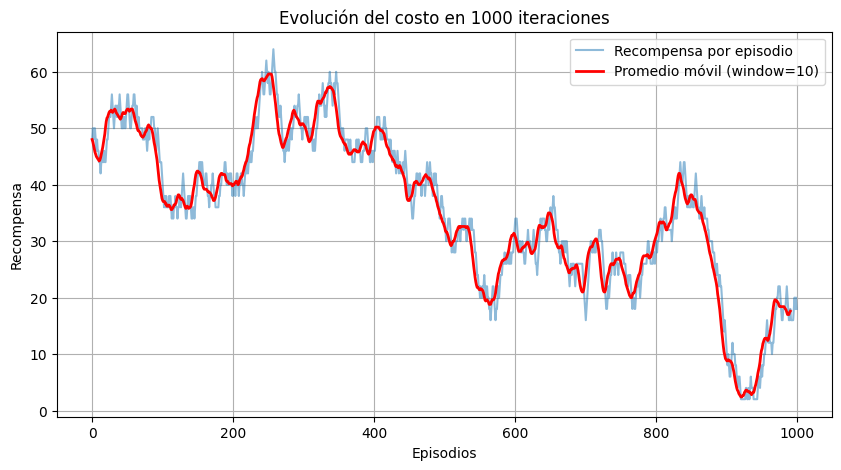

In [25]:
title = 'Evolución del costo en 1000 iteraciones'
plot_rewards(cost,title, window_size=10)

## Pruebas

In [ ]:
agent1_actions = np.array([-0.2, 0, 0.2])
agent2_actions =  np.array([-2, 0, 2])

agent1_states = np.round(np.linspace(0, 10, 51),2) # espacio de potencias discreto de 0-10
agent2_states = np.round(np.linspace(0, 100, 51),2)# espacio de precios discretos de 0 - 100

# a1_generation_power = np.round(np.linspace(10, 20, 51),2)
# a1_demand_power = np.round(np.linspace(30, 40, 51),2)

# a2_generation_power = np.round(np.linspace(80, 90, 51),2)
# a2_demand_power = np.round(np.linspace(50, 60, 51),2)


generation_power = np.round(np.linspace(80, 90, 51),2)
demand_power = np.round(np.linspace(50, 60, 51),2)
agent_parameters = {
    'name': 'A',
    'actions': agent1_actions,
    'opponent_actions': agent2_actions,
    'states': agent1_states,
    'opponent_states': agent2_states,
    'epsilon': 0.2,
    'rol': 'generator'
}

agent_parameters2 = {
    'name': 'B',
    'actions': agent2_actions,
    'opponent_actions': agent1_actions,
    'states': agent2_states,
    'opponent_states': agent1_states,
    'epsilon': 0.1,
    'rol': 'consumer'
}

agent = Prosumer(agent_parameters)
opponent = Prosumer(agent_parameters2)

p2pmarket = P2PEnergyMarket(a = 0.089, b = 52, c = 0)

steps = 20000
decay = 10**(np.log10(0.01)/steps)
mmq = MinimaxQ(agent, gamma=0.9, epsilon=0.2, alpha=1, decay=decay)

trainer = MinimaxTrainer(agent=agent, opponent=opponent, enviroment=p2pmarket, algorithm=mmq)

In [ ]:
agent_state = agent.get_state(np.random.randint(0, len(agent.agent_states)))
opponent_state = opponent.get_state(np.random.randint(0, len(opponent.agent_states)))

state = (agent_state, opponent_state)
state2 = (opponent_state, agent_state)



In [ ]:
# Agent action and next state
action = round(agent.choose_action(state),2)
opponent_action = opponent.choose_action(state2)

joint_action = (action, opponent_action)

next_state = p2pmarket.get_next_state(agent, opponent, state, joint_action)
print('state: ', state)
print('action: ', joint_action)
print('next state: ', next_state)



# Obtein the reward
reward = p2pmarket.get_reward(rol=agent.rol, generator_state=state[0], consumer_state=state[1])
print('reward: ', reward)

# Calculate the new policy
policy = mmq.update(state, action, opponent_action, reward, next_state)
print('policy: ', policy)


# Update states and policy
state = next_state
agent.pi_table = policy

state:  (2.4, 40.0)
action:  (-0.2, -2)
next state:  (2.2, 38.0)
reward:  -0.6462780193545384
policy:  {(0.0, 0.0): {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333333333}, (0.0, 2.0): {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333333333}, (0.0, 4.0): {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333333333}, (0.0, 6.0): {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333333333}, (0.0, 8.0): {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333333333}, (0.0, 10.0): {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333333333}, (0.0, 12.0): {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333333333}, (0.0, 14.0): {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333333333}, (0.0, 16.0): {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333333333}, (0.0, 18.0): {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333